In [2]:
from importlib import reload
import xgi
import numpy as np
import matplotlib.pyplot as plt
import random
import growing_hypergraph
from importlib import reload
import matplotlib
import math
from statistics import mean
import plotly.express as px
import pandas as pd

In [4]:
reload(growing_hypergraph)

<module 'growing_hypergraph' from '/Users/violetross/Desktop/Summer-24/Code/Novel and Exterior Node Addition/growing_hypergraph.py'>

# Binary Entropy Function

In [7]:
def binary_entropy(prop_1s):
    if prop_1s == 0 or prop_1s == 1:
        entropy = 0
    else:
        entropy = (-prop_1s) * math.log(prop_1s, 2) - (1 - prop_1s) * math.log(1 - prop_1s, 2)
    return(entropy)

# Experiment Function

In [5]:
def experiment(ext, new, num_new = 1, num_ext = 1, lambda_u = 1, lambda_r = 1, neighb_prob = 1):
    avg_entropies = []
    for i in np.arange(0, 1.1, 0.1):
        for j in np.arange(0, 1.1, 0.1):
            H = xgi.Hypergraph([[0,1]])
            H.set_node_attributes({0 : 0, 1 : 1}, name = "label")
            GH = growing_hypergraph.GH(H, [0, 1], i, j)
            for k in range(0, 100):
                GH.add_hyperedge(ext, new, num_new, num_ext, lambda_u, lambda_r, neighb_prob)
            labels = H.nodes.attrs("label").aslist()
            edge_entropies = []
            for k in range(0, H.num_edges):
                nodes_0 = list(filter(lambda x: labels[x] == 0, H.edges.members(k)))
                nodes_1 = list(filter(lambda x: labels[x] == 1, H.edges.members(k)))
                prop = len(nodes_1) / (len(nodes_0) + len(nodes_1))
                entropy = binary_entropy(prop)
                edge_entropies.append(entropy)
            avg_entropy = mean(edge_entropies)
            avg_entropies.append([i, j, avg_entropy])
    avg_entropies = np.array(avg_entropies)
    fig, ax = plt.subplots()
    scatter = plt.scatter(x = avg_entropies[:, 0], y = avg_entropies[:, 1], c = avg_entropies[:, 2])
    handles, labels = scatter.legend_elements()
    legend = ax.legend(*scatter.legend_elements(), loc='upper left', bbox_to_anchor=(1.05, 1.0), title = "Entropy")
    plt.xlabel("value of p")
    plt.ylabel("value of q")
    plt.show

# Carrying Out Experiments

### Standard ext, standard new

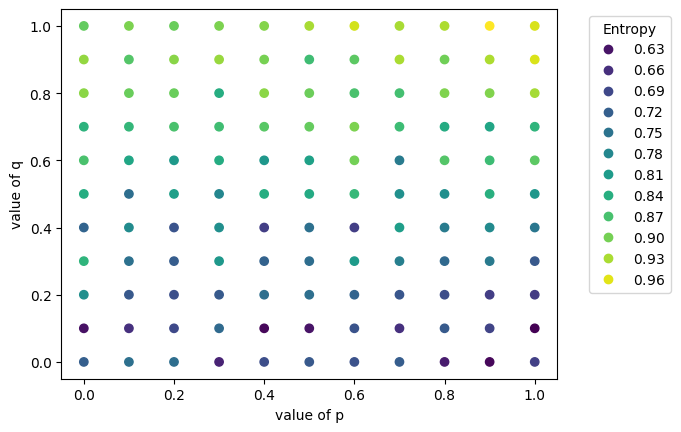

In [8]:
experiment("standard", "standard")

Comments: Lower q -> lower entropy. No clear relationship between p and entropy.

Future: Vary number of added nodes.

### Poisson ext, standard new

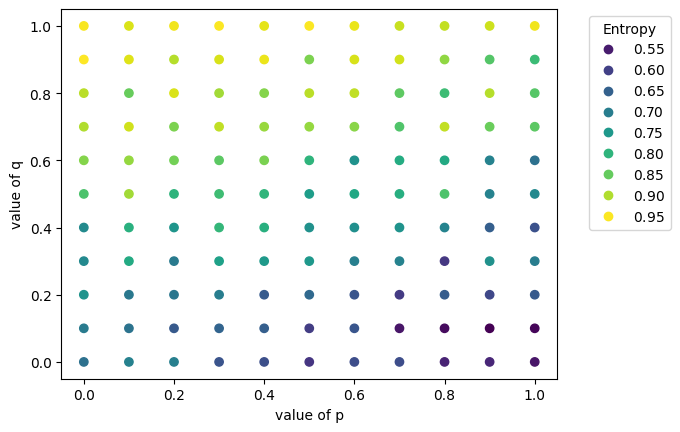

In [328]:
experiment("poisson", "standard", lambda_u = 4, lambda_r = 1)

Comments: Lower q -> lower entropy. No clear relationship between p and entropy.
    
Future: Vary how we pick lambda.

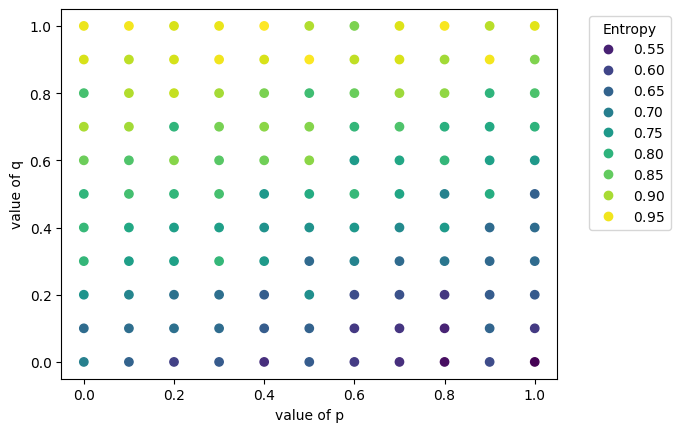

In [11]:
experiment("poisson nonunif", "standard", lambda_u = 4, lambda_r = 1, neighb_prob = 0.75)

Comments: Higher dependency on p than in uniform poisson.

### Standard ext, majority label new

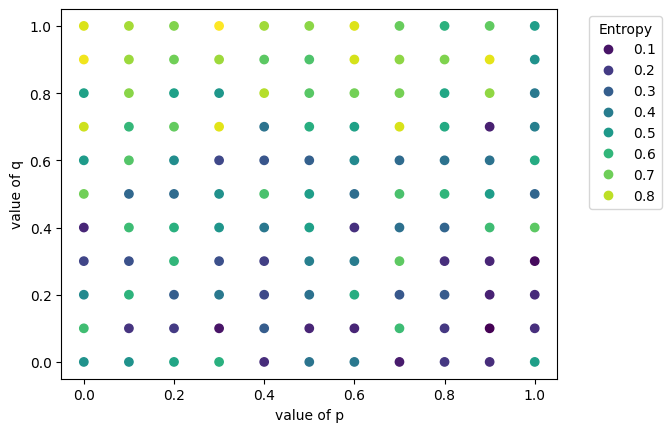

In [331]:
experiment("standard", "majority label")

Comments: Vaguely looks like low p, high q -> high entropy and high p, low q -> low entropy.

### Standard ext, u label new

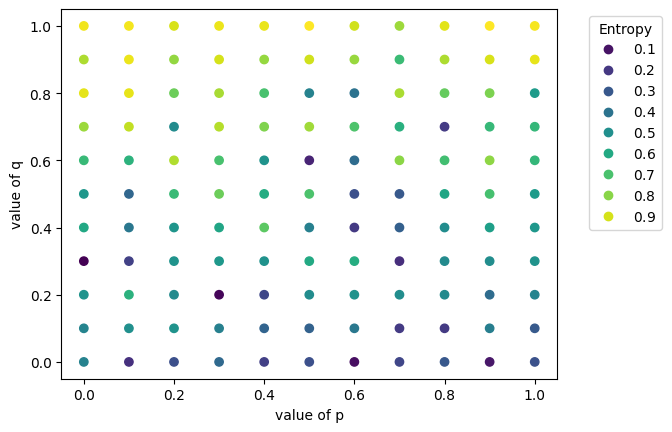

In [332]:
experiment("standard", "u label")

Comments: Roughly low q -> low entropy.

### Standard ext, bernoulli new with parameter equal to the proportion of 1s in the edge

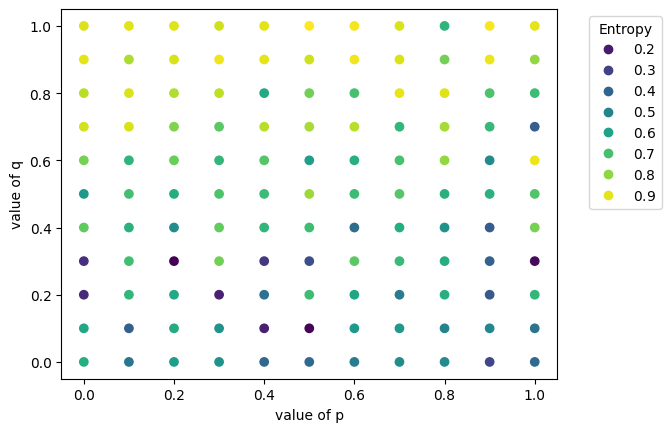

In [335]:
experiment("standard", "bern edge prop")

Comments: Roughly low q -> low entropy.

### Standard ext, bernoulli new with parameter equal to p

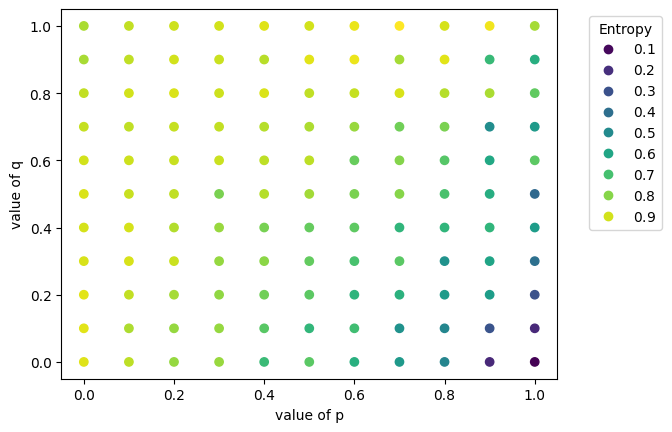

In [336]:
experiment("standard", "bern p")

Comments: Roughly low p -> low entropy.

### Standard ext, poisson new

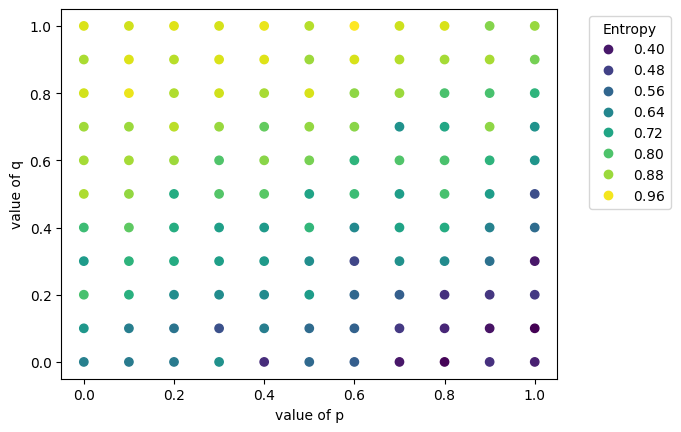

In [337]:
experiment("standard", "poisson", lambda_u = 4, lambda_r = 1)

Comments: low p, high q -> high entropy and high p, low q -> low entropy.

### Poisson ext, Poisson new

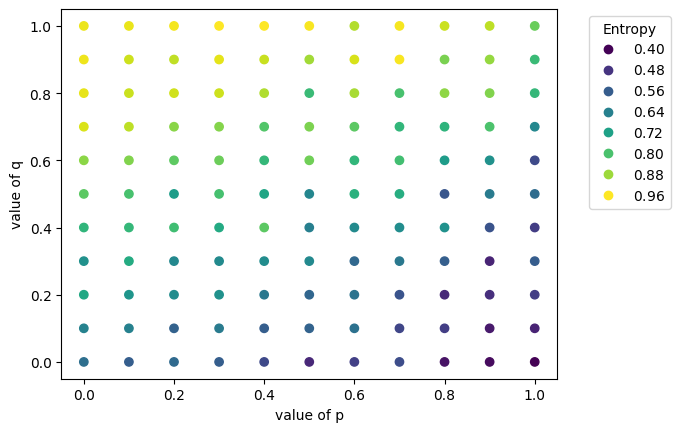

In [338]:
experiment("poisson", "poisson", lambda_u = 4, lambda_r = 1)

Comments: low p, high q -> high entropy and high p, low q -> low entropy.

# Other Experiments

If you want to see average edge entropy over time, do experiment 2!

In [344]:
def experiment2(ext, new, num_new = 1, num_ext = 1, lambda_u = 1, lambda_r = 1):
    avg_entropies = []
    for i in np.arange(0, 1.1, 0.1):
        for j in np.arange(0, 1.1, 0.1):
            H = xgi.Hypergraph([[0,1]])
            H.set_node_attributes({0 : 0, 1 : 1}, name = "label")
            GH = growing_hypergraph.GH(H, [0, 1], i, j)
            for k in range(0, 100):
                GH.add_hyperedge(ext, new, num_new, num_ext, lambda_u, lambda_r)
                labels = H.nodes.attrs("label").aslist()
                edge_entropies = []
                for L in range(0, H.num_edges):
                    nodes_0 = list(filter(lambda x: labels[x] == 0, H.edges.members(L)))
                    nodes_1 = list(filter(lambda x: labels[x] == 1, H.edges.members(L)))
                    prop = len(nodes_1) / (len(nodes_0) + len(nodes_1))
                    entropy = binary_entropy(prop)
                    edge_entropies.append(entropy)
                avg_entropy = mean(edge_entropies)
                avg_entropies.append([k, i, j, avg_entropy])
    df = pd.DataFrame(avg_entropies)
    return px.scatter(df, x = 1, y = 2, animation_frame = 0, color = 3)

If you want to see the entropy of only the edge added at each time step, do experiment 3!

In [342]:
def experiment3(ext, new, num_new = 1, num_ext = 1, lambda_u = 1, lambda_r = 1):
    new_edge_entropies = []
    for i in np.arange(0, 1.1, 0.1):
        for j in np.arange(0, 1.1, 0.1):
            H = xgi.Hypergraph([[0,1]])
            H.set_node_attributes({0 : 0, 1 : 1}, name = "label")
            GH = growing_hypergraph.GH(H, [0, 1], i, j)
            for k in range(0, 100):
                GH.add_hyperedge(ext, new, num_new, num_ext, lambda_u, lambda_r)
                labels = H.nodes.attrs("label").aslist()
                nodes_0 = list(filter(lambda x: labels[x] == 0, H.edges.members(H.num_edges - 1)))
                nodes_1 = list(filter(lambda x: labels[x] == 1, H.edges.members(H.num_edges - 1)))
                prop = len(nodes_1) / (len(nodes_0) + len(nodes_1))
                entropy = binary_entropy(prop)
                new_edge_entropies.append([k, i, j, entropy])
    df = pd.DataFrame(new_edge_entropies)
    return px.scatter(df, x = 1, y = 2, animation_frame = 0, color = 3)

In [349]:
experiment2("poisson", "poisson", lambda_u = 4, lambda_r = 1)

In [348]:
experiment3("poisson", "poisson", lambda_u = 4, lambda_r = 1)